# 19기 Clustering 정규세션 과제

## Clustering 해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. Clustering 
수업 내용 및 실습 자료를 참고하여 클러스터링을 자유롭게 진행해주세요. 한 알고리즘에 대해 파라미터를 바꿔가며 비교를 해도 되고, 여러 알고리즘의 결과를 비교해도 됩니다.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


* Annual Income (k$) : 고객의 연 수입
* Spending Score (1-100) : 고객의 행동과 소비성향에 따라 쇼핑몰이 부여하는 점수

## 1. Preprocessing / EDA

In [4]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# df['Gender'] = np.where(df['Gender'] == 'Male', 0, 1)

In [29]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


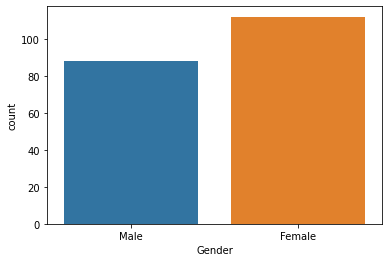

In [24]:
sns.countplot(x='Gender', data = df)
plt.show()

여성의 비율이 더 높음

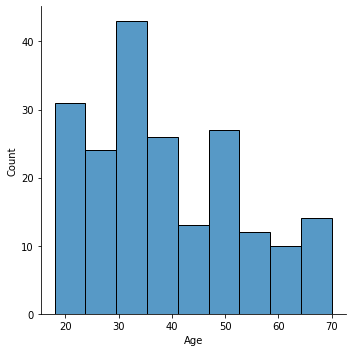

<Figure size 576x432 with 0 Axes>

In [14]:
sns.displot(x='Age', data = df)
plt.figure(figsize =(8,6))
plt.show()

30-35세의 비율이 높다.

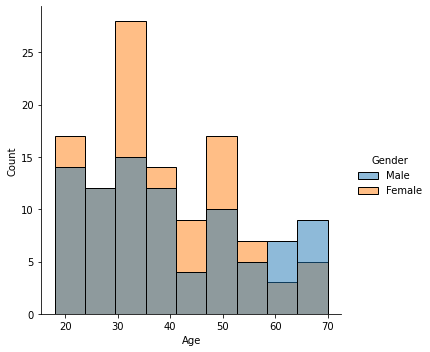

<Figure size 576x432 with 0 Axes>

In [26]:
sns.displot(x='Age', hue = 'Gender', data = df)
plt.figure(figsize =(8,6))
plt.show()

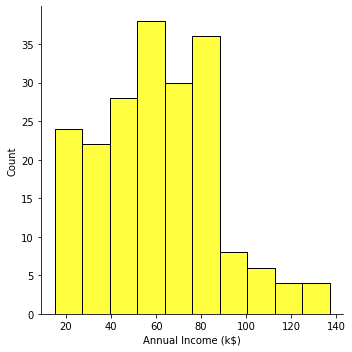

<Figure size 576x432 with 0 Axes>

In [17]:
sns.displot(x='Annual Income (k$)', data = df, color = "yellow")
plt.figure(figsize =(8,6))
plt.show()

90$전 까지 고루 분포하고 있다. 

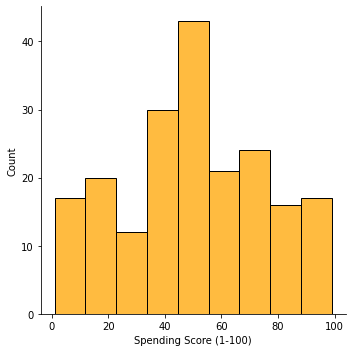

<Figure size 576x432 with 0 Axes>

In [19]:
sns.displot(x='Spending Score (1-100)', data = df, color = "orange")
plt.figure(figsize =(8,6))
plt.show()

40에서 60사이의 점수가 제일 높다.

<AxesSubplot:>

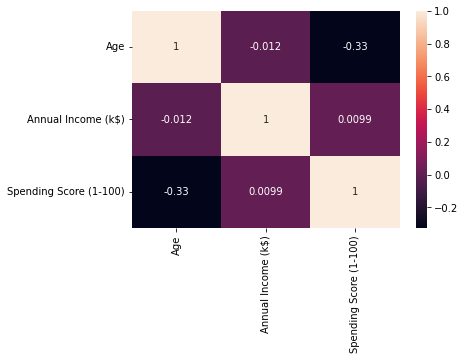

In [32]:
sns.heatmap(df[["Age","Annual Income (k$)","Spending Score (1-100)"]].corr(),annot = True)

In [35]:
ndf = df[['Age', "Annual Income (k$)","Spending Score (1-100)", "Gender"]]

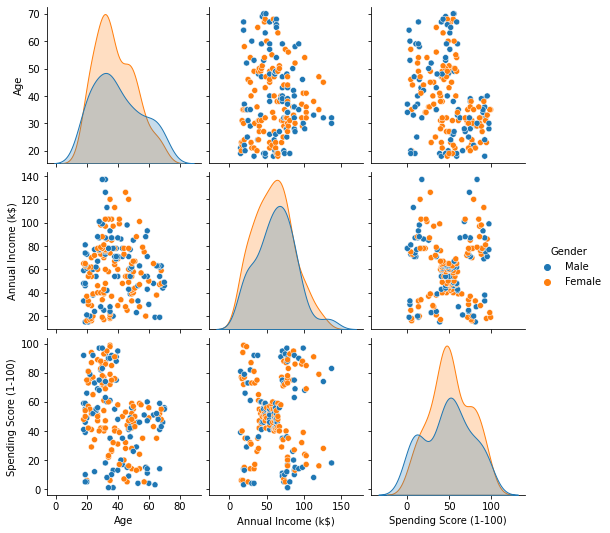

In [36]:
sns.pairplot(ndf, hue = 'Gender')

## 2. Clustering

In [37]:
import warnings 
from sklearn.preprocessing import StandardScaler# normalize data
from sklearn.cluster import KMeans

In [41]:
# 표준화
x = df[["Age","Annual Income (k$)","Spending Score (1-100)"]]

sc = StandardScaler()
model = sc.fit(x)
scaled_data = model.transform(x)

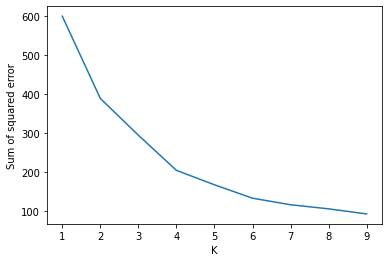

In [42]:
sse = []
# 표준화된 데이터로 클러스터링
for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [43]:
# elbow_point 4로 결정 
n_clusters=4
km = KMeans(n_clusters = n_clusters)
df['cluster']= km.fit_predict(scaled_data)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,,,
1,Male,19,15,39,2
2,Male,21,15,81,2
3,Female,20,16,6,2
4,Female,23,16,77,2
5,Female,31,17,40,2


In [45]:
clustered_train = km.predict(scaled_data)

In [47]:
from sklearn.metrics import silhouette_score
print(silhouette_score(scaled_data, clustered_train))

0.4039582785148566
